<a href="https://colab.research.google.com/github/rupam-20/CAR-PRICE-PREDICATION/blob/main/Car_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libaries**


In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as   sns
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')



# **Loading and inspecting the Dataset**

In [26]:
df = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [27]:
df_main.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [28]:
df.shape

(4340, 8)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [30]:
#numerical stats
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### **DATA CLEANING**

In [31]:
# 3. Check missing values
print("\nMissing values in each column:\n", df.isnull().sum())



Missing values in each column:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [32]:
# Drop duplicates
df = df.drop_duplicates()

# Rename columns for convenience
df.rename(columns={'year':'Year', 'selling_price':'Selling_Price', 'km_driven':'Km_Driven',
                   'fuel':'Fuel', 'seller_type':'Seller_Type',
                   'transmission':'Transmission', 'owner':'Owner'}, inplace=True)
# Feature engineering: Car age
current_year = 2025
df['Car_Age'] = current_year - df['Year']

# Drop 'Year' (since Car_Age is more meaningful)
df = df.drop(columns=['Year'])

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

print("Dataset after encoding:\n", df.head())


Streaming output truncated to the last 5000 lines.
3                                False                 False   
4                                False                 False   

   name_Ford Freestyle Titanium  name_Ford Freestyle Titanium Diesel  \
0                         False                                False   
1                         False                                False   
2                         False                                False   
3                         False                                False   
4                         False                                False   

   name_Ford Freestyle Titanium Diesel BSIV  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   name_Ford Freestyle Titanium Plus  \
0                              False   
1                       

### **Exploratory Data Analysis (EDA)**

In [33]:
df_main.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

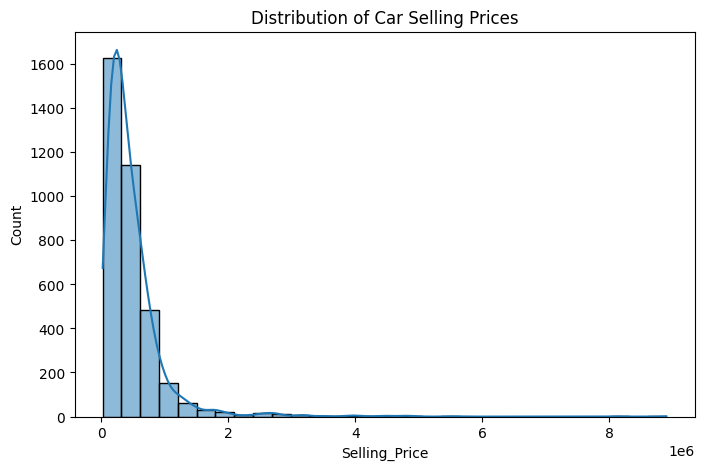

In [34]:
# Distribution of Selling Price
plt.figure(figsize=(8,5))
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.title("Distribution of Car Selling Prices")
plt.show()

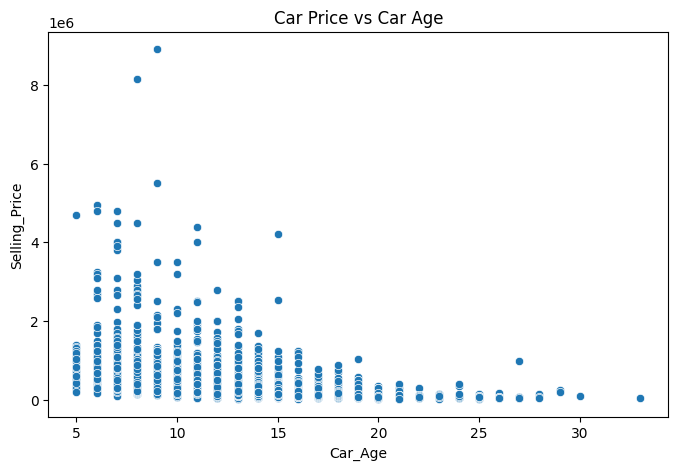

In [35]:
# Car Price vs Car Age
plt.figure(figsize=(8,5))
sns.scatterplot(x='Car_Age', y='Selling_Price', data=df)
plt.title("Car Price vs Car Age")
plt.show()

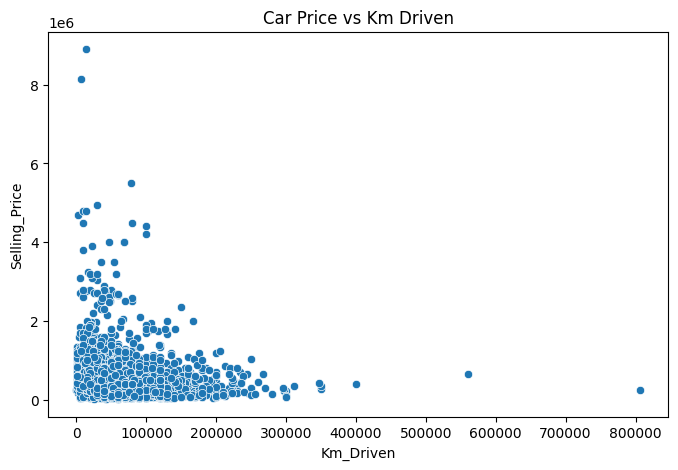

In [36]:
# Car Price vs Km Driven
plt.figure(figsize=(8,5))
sns.scatterplot(x='Km_Driven', y='Selling_Price', data=df)
plt.title("Car Price vs Km Driven")
plt.show()

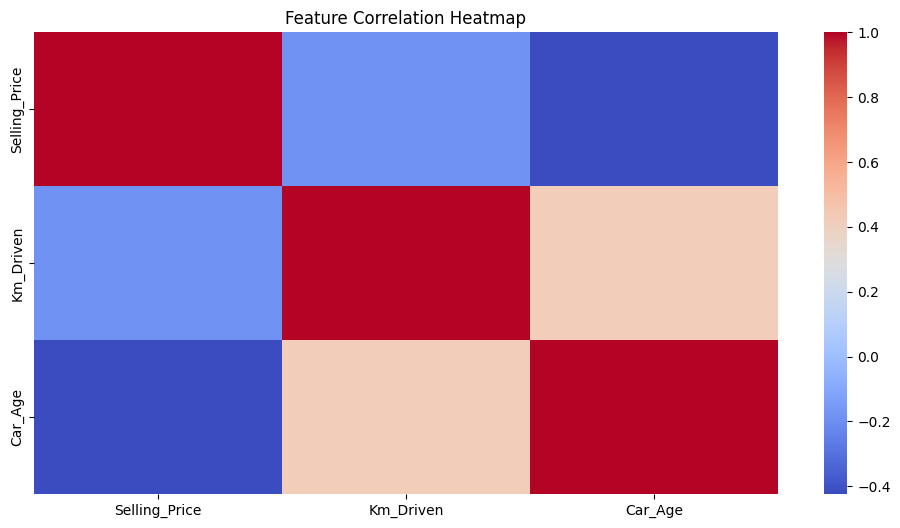

In [37]:
# Correlation Heatmap (numeric only)
plt.figure(figsize=(12,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()




# Data Preparation


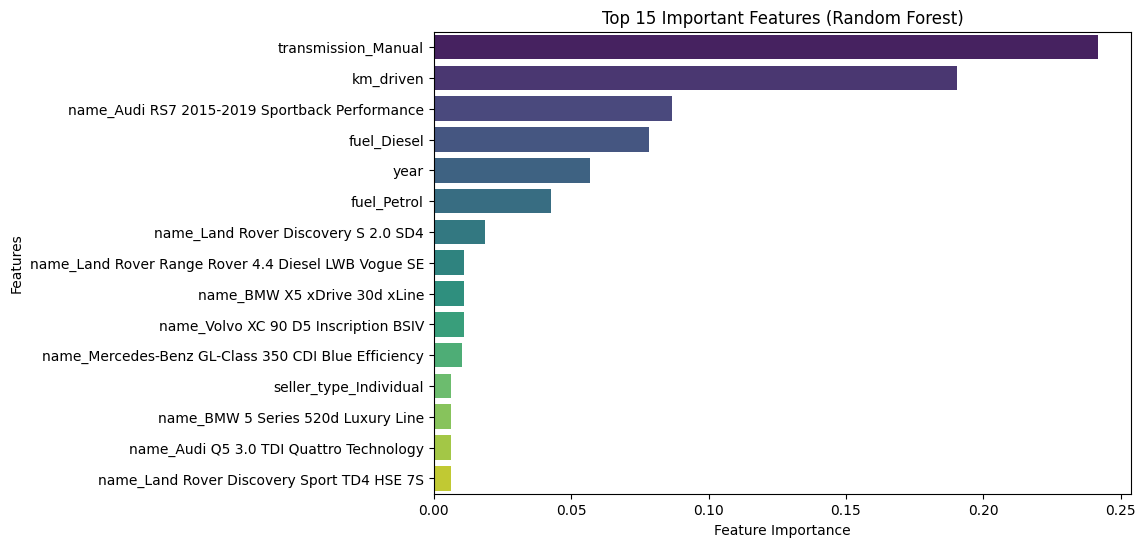

In [48]:
# Get feature importances
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot only top 15 features
top_features = feature_importance.head(15)

plt.figure(figsize=(9, 6))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()





## Model Building

In [40]:
# Define features and target
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

# Show results
results_df = pd.DataFrame(results).T
print("\nModel Performance:\n", results_df)


Model Performance:
                              MAE           RMSE        R2
Linear Regression  156932.404130  403138.540828  0.495486
Random Forest      149739.438019  394210.438185  0.517585
XGBoost            165824.640625  394013.919592  0.518066


# 6. Insights

In [39]:

print("\n🔹 Key Insights:")
print("- Car Age strongly reduces the selling price (older cars → cheaper).")
print("- Km Driven has a negative effect on price but less than Car Age.")
print("- Brand and Fuel type play a major role in resale value.")
print("- Random Forest and XGBoost perform better than Linear Regression.")


🔹 Key Insights:
- Car Age strongly reduces the selling price (older cars → cheaper).
- Km Driven has a negative effect on price but less than Car Age.
- Brand and Fuel type play a major role in resale value.
- Random Forest and XGBoost perform better than Linear Regression.
